In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [95]:
np.random.seed(0) #makes the random numbers predicatable

normal == gaussian

In [96]:
dogs_whisker_length = np.random.normal(loc = 5, scale = 1, size= 10 ) #mean, std, number of datapoints
dogs_ear_flapiness_index = np.random.normal(loc = 8, scale = 1, size= 10 ) #mean, std, number of datapoints

In [97]:
cats_whisker_length = np.random.normal(loc = 8, scale = 1, size= 10 ) #mean, std, number of datapoints
cats_ear_flapiness_index = np.random.normal(loc = 5, scale = 1, size= 10 ) #mean, std, number of datapoints

In [98]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

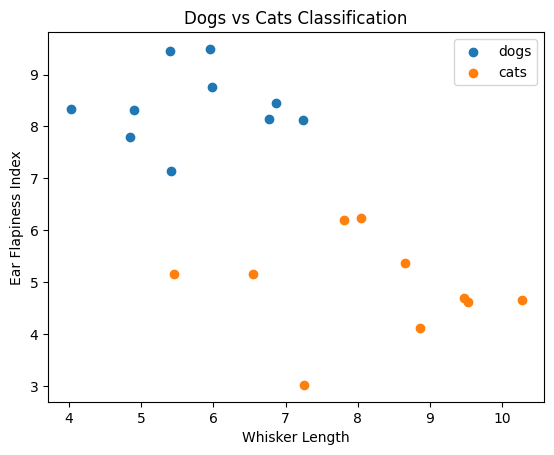

In [99]:
plt.scatter(dogs_whisker_length, dogs_ear_flapiness_index, label = "dogs") #label is for legend
plt.scatter(cats_whisker_length, cats_ear_flapiness_index, label = "cats")
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()



In [100]:
def compute_error(dogs, cats, theta, theta0):
    error = 0
    for x in dogs:
        if np.dot(x, theta) + theta0 <= 0:
            error+=1
        if np.dot(x, theta) + theta0 > 0:
            error+=1
    return error

In [101]:
#d is the number of features: here it is 2
def random_linear_classifier(dogs, cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size = d) #here is it theta1 and theta2; based on d
        #theta is a vector with two dimensions
        theta0 = np.random.normal()

        error = compute_error(dogs, cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error


In [102]:
dogs = np.vstack((dogs_whisker_length, dogs_ear_flapiness_index)).T
cats = np.vstack((cats_whisker_length, cats_ear_flapiness_index)).T
data = np.vstack((dogs, cats))
labels =  np.hstack((np.zeros(len(dogs)),np.ones(len(cats))))


In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [104]:
k = 100
d = 2
theta, theta0, train_error = random_linear_classifier(X_train[y_train==0], X_train[y_train==1], k, d)

print(theta, theta0)

print(f"Training Error: {train_error}")

[-1.04855297 -1.42001794] -1.7062701906250126
Training Error: 8


In [105]:
k = 100
d = 2
theta, theta0, test_error = random_linear_classifier(X_test[y_test==0], X_test[y_test==1], k, d)

print(theta, theta0, test_error)
print(f"Testing Error: {test_error}")

[ 1.0685094 -0.4533858] -0.6878376110286823 2
Testing Error: 2
